# Transformations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Translations

In [4]:
# Load an image
blue_flow = cv2.imread('img/blue-flowers.jpg')
blue_red_flow = cv2.imread('img/blue-red-flowers.png')
text =cv2.imread('img/clean-text.jpg')
day1 =cv2.imread('img/day1.jpg')
day2 =cv2.imread('img/day2.jpg')
day3 =cv2.imread('img/day3.jpg')
day4 =cv2.imread('img/day4.jpg')
night1 = cv2.imread('img/night1.jpg')
night2 = cv2.imread('img/night2.jpg')
night3 = cv2.imread('img/night3.jpg')
night4 = cv2.imread('img/night4.jpg')

In [3]:
def imshow(img, grayscale= False):
    plt.figure(figsize=(10,15))
    if grayscale:
        plt.imshow(img, cmap='gray')# black image
    else:
        plt.imshow(img[:,:,::-1])# reverse order form BGR to RGB

In [19]:
# Store the height and width of the image (you will need them later)
height , width = night1.shape[:2]

In [21]:
width

760

In [22]:
# Create the translation Matrix
T_matrix = np.float32([[1,0,50],[0,1,100]])

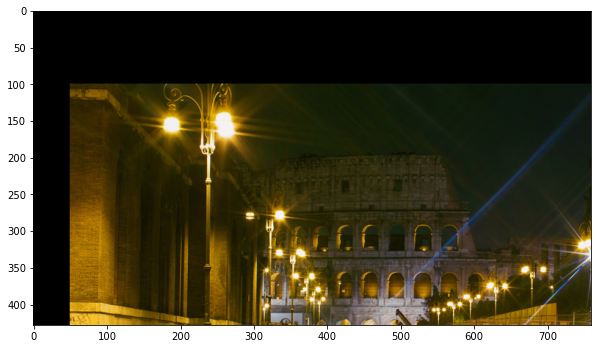

In [23]:
# Apply the translation to the image using cv2.warpAffine and display the new image
new_night1 = cv2.warpAffine(night1, T_matrix, (width,height))
imshow(new_night1)

### Rotation

In [35]:
# Load an image

# Create a rotation matrix to rotate the image by 45 degrees (using the center as the pivot point) 
x_center = width/2
y_center =height/2
angle= 180
scale = 1

Rotation_matrix = cv2.getRotationMatrix2D((x_center,y_center),angle,scale)

In [36]:
Rotation_matrix

array([[-1.0000000e+00,  1.2246468e-16,  7.6000000e+02],
       [-1.2246468e-16, -1.0000000e+00,  4.2800000e+02]])

[Hint](# "cv2.getRotationMatrix2D") 


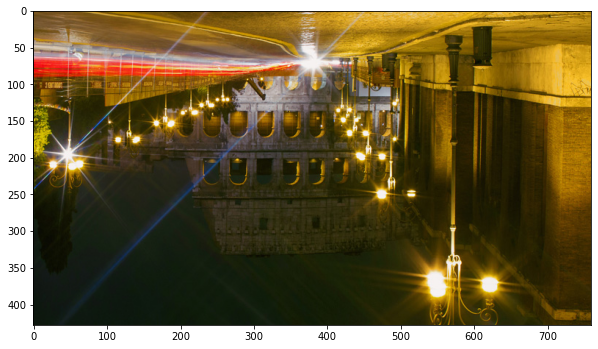

In [37]:
# Apply the rotation matrix to the image and display the rotated image
rot_night1=cv2.warpAffine(night1, Rotation_matrix, (width, height))
imshow(rot_night1)

### Scaling images

#### Interpolation methods

* INTER_NEAREST - a nearest-neighbor interpolation (Fastest)
* INTER_LINEAR - a bilinear interpolation (used by default) (good for upsampling)
* INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method. (Good for downsampling)
* INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood (Better)
* INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood (Best one)

#### Downsampling

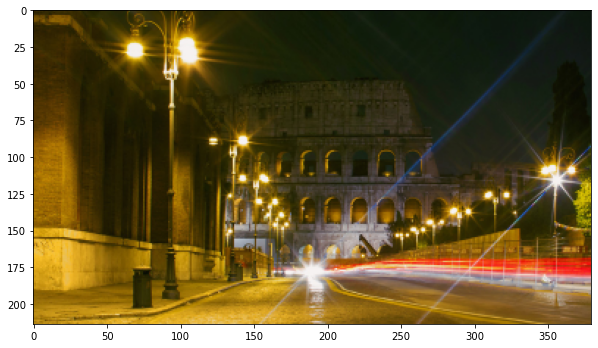

In [38]:
# Load and image and downsample it by half, try all the interpolation methods
# which one renders the best result?
dwn_smp_night1 = cv2.resize(night1, (width//2,height//2),interpolation=cv2.INTER_AREA) # resize the pixels (image quality)
# dwn_smp_night1 = cv2.resize(night1,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA) # other way
imshow(dwn_smp_night1)

[Hint](# "cv2.resize") 

#### Upsampling

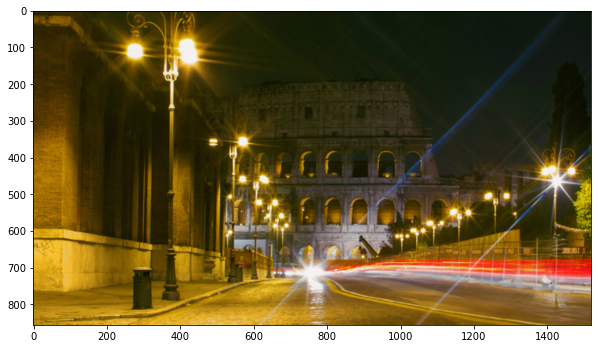

In [41]:
# Load and image and upsample it by double its size, try all the interpolation methods 
# which one renders the best result?
up_smp_night1 = cv2.resize(night1, (width*2,height*2),interpolation=cv2.INTER_LINEAR)
imshow(up_smp_night1)
